# Final Project - Data Science/Spatial Analysis

## 1. Project Title

Optimal siting of electric vehicle chargers in Tokyo

## 2. Team members

Sohei Yamada (A59004030) <br>
Yuki Imura (A59011525)

## 3. Questions we addressed, why it is important (5pt)

<p>Our overarching question is to find the optimal points to locate electric vehicle (EV) chargers in Tokyo. Therefore, we performed an analysis using geographic information and machine learning method to answer the following three questions:</p>

### Question 1: Do existing electric vehicle (EV) chargers have sufficient coverage to promote EVs?

<p>Since EVs require frequent recharging, EV adoption may be delayed in areas far from EV chargers. We used data on EV charger locations in Tokyo to analyze the geographical coverage. Regular chargers, which take a long time to recharge, are suitable for places where EVs are left for a long time, such as home or office parking lots. However, rapid chargers are necessary to promote EVs because people want to charge EVs in a short time. For this reason, this paper focuses mainly on rapid chargers.</p>

### Question 2: Are the existing EV chargers unevenly distributed among specific socioeconomic communities?

<p>We hypothesized that EV chargers might be unevenly distributed in higher-income neighborhoods because EVs and EV chargers are expensive. Such geographic bias may increase the disproportionate disparity in environmental impacts and health risks by the community because gasoline vehicles emit more carbon dioxide, PM2.5, and other toxins than EVs. We used municipality-level Tokyo metropolitan census data and EV charger location data to determine the relationship between socioeconomic characteristics and EV charger location at the municipality level.</p>

### Question 3:  Where are the optimal places to locate EV charging stations?

<p>After analyzing essential features related to EV charger locations, we proposed where EV charge stations should be installed in Tokyo, utilizing Japanese administrative data.</p>

<p>In light of these analyses, we found optimal locations for new charging stations in the most needed areas in Tokyo. Our analysis would promote EV penetration and contribute to realizing net zero emissions (related to SDGs 13) efficiently and effectively.</p>


## 4. Background and literature (5pt)

<p>Greenhouse gas reduction has become an issue of global importance. Governments are instituting policies to transition from gasoline-powered vehicles to EVs with lower carbon dioxide emissions. For example, California has decided that all new passenger cars sold in California will be zero-emission vehicles, including EVs, by 2035 (California Air Resources Board, n.d.). The EV penetration rate in California is 9.5%. On the other hand, Japan has also set a policy that all new passenger cars will be electric vehicles by 2035, but the EV penetration rate in 2021 was less than 1% (Momota, 2022). One of the reasons for the slow spread of EVs in Japan is the slow development of charging infrastructure. The number of EV charging facilities in Japan has remained at about 30,000 from 2018 to 2022, while the governmental target is over 150,000 (Ministry of Economy, Trade and Industry, Japan, 2022). It is necessary to increase the number of EVs by installing charging facilities in optimal locations to popularize EVs in Japan.</p>

<p>Bayram et al. (2022) studied where to place fast chargers among existing gas stations to achieve the maximum coverage with the minimum number (Maximum coverage location problem). Their analysis did not include Tokyo, so we will conduct it and go further by analyzing other factors in determining charger locations.</p>

<p>Oda et al. (2017) studied the effect of increasing an additional EV charging unit in existing stations in Japan. They found that adding one more unit to stations with only one unit will reduce waiting time for drivers and be cost-effective. We agreed with this result and tried to find where to allocate one more unit by machine learning method.</p>

<p>Erbaş et al. (2018) evaluated the suitability of existing EV charger locations in Ankara by setting 15 criteria for environmental, economic, and urbanity (multiple-criteria decision analysis), and proposed optimal placement of EV chargers in the study area. A map of the entire study area was created, scoring the 15 criteria, and it was concluded that the location with the highest score was the best location for the EV chargers. We applied their concept of using multiple criteria to Tokyo.</p>

<p>In addition, Xu et al. (2013) proposed a solution for placing chargers to minimize operating distance (Minimum total transportation distance). However, this is a mathematical solution, not a geo-informed solution. Our machine learning usage can contribute to this problem-solving reasonably.</p>

<p>We proposed the optimal siting of EV chargers in Tokyo by analyzing the current installation status of EV chargers and using administrative data such as road conditions and population in Tokyo.</p>

## 5. Python packages you used and why (5pt)

<p>We used the following libraries to perform our analysis:</p>

### (a) Pandas library

<p>Necessary to manipulate dataframes</p>

In [1]:
import pandas as pd

### (b) GeoPandas library

<p>Necessary to manipulate geospatial dataframes</p>

In [2]:
import geopandas as gpd

### (c) ArcGIS library

<p>Necessary to maximize coverage and minimize facilities</p>

In [3]:
import warnings
warnings.filterwarnings("ignore")

import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.geoenrichment import *
from arcgis.features import GeoAccessor, FeatureLayer, Feature, FeatureSet, FeatureCollection, find_locations
import arcgis.network as network

#gis = GIS("https://ucsdonline.maps.arcgis.com/home/", client_id='xH567LTL8jqxk6wx')
gis = GIS(username="gpec447sp23_15")

token = gis._con.token

Enter password: ········


### (d) requests library

<p>Necessary to make it easy to manipulate HTTP requests.</p>

In [4]:
import requests

### (e) urllib library

<p>Necessary to make it easy to manipulate URL requests.</p></p>

In [5]:
import urllib

### (f) tqdm library

<p>Necessary to create a smart progress bar for the loops</p>

In [6]:
import tqdm

### (g) datetime library

<p>Necessary for date and time manipulation.</p>

In [7]:
from datetime import datetime

### (h) OS library

<p>Necessary to set environment for our work</p>

In [8]:
import os
os.environ['USE_PYGEOS'] = '0'
data_location = os.environ["HOME"]+"/private/"

### (i) Folium & Matplot library

<p>Necessary to make a map</p>

In [9]:
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

### (j) Shapely library

<p>Necessary to depict graphs</p>

In [10]:
from shapely.geometry import Point

### (k) seaborn library

<p>Necessary to visualize statistical data</p>

In [11]:
import seaborn as sns

### (l) scikit-learn library

<p>Necessary to perform machine learning.</p>

In [12]:
from arcgis.features import GeoAccessor, GeoSeriesAccessor, FeatureLayerCollection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

### (m) Statsmodels library

<p>Necessary to run simple regression map</p>

In [13]:
import statsmodels.api as statmodels

### (n) NumPy library

<p>Necessary to perform calcupation efficiently.</p>

In [14]:
import numpy as np

### (o) GeoPy library

<p>Necessary for geocoder for OpenStreetMap data.</p>

In [15]:
from geopy.geocoders import Nominatim

### (p) IPython library

<p>Necessary to use an interactive command-line terminal for Python</p>

In [16]:
from IPython.display import display

<center><b>Table 1: Libraries we use by question</b></center>

<table>
    <tr>
        <th></th>
        <th>(a)</th>
        <th>(b)</th>
        <th>(c)</th>
        <th>(d)</th>
        <th>(e)</th>
        <th>(f)</th>
        <th>(g)</th>
        <th>(h)</th>
        <th>(i)</th>
        <th>(j)</th>
        <th>(k)</th>
        <th>(l)</th>
        <th>(m)</th>
        <th>(n)</th>
        <th>(o)</th>
        <th>(p)</th>
    </tr>
    <tr>
        <th>Question 1: Coverage</th>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <th>Question 2: Distribution</th>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
    </tr>
    <tr>
        <th>Question 3: Optimal location</th>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>✔</td>
        <td>✔</td>
        <td>✔</td>
    </tr>
</table>

## 6. Data sources (10pt)

### Inputs and outputs

<p>This code requires the following input files and outputs the following files. These files are located in the following directory:</p>

In [17]:
path = "https://raw.githubusercontent.com/yimurayimura/GIS-Final-Project/main/" 

#### Input files

<center><b>Table 2: List of inputs of this code</b></center>

<table>
    <tr>
        <th>File name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>EVC_location.csv</td>
        <td>EV charger location data throughout Japan, which includes the name and physical address of locations in the Japanese language and the number of chargers</td>
    </tr>
    <tr>
        <td>h02_13.csv</td>
        <td>Street (One level lower than the municipality-level) names and population data in Tokyo</td>
    </tr>
    <tr>
        <td>X_tokyo_enhance.csv</td>
        <td>Municipality names and their social data, including populations and monthly expenditures  in Tokyo, collected from the Tokyo Metropolitan Government and the Japanese government</td>
    </tr>
        <td>h27ka13.gml</td>
        <td>2015 census block boundaries</td>
    </tr>
</table>

#### Output files

<center><b>Table 3: List of outputs of this code</b></center>

<table>
    <tr>
        <th>File name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>EVC_loc_tokyo</td>
        <td>EV charger location data throughout Tokyo, which includes longitudes, latitudes, and the number of chargers</td>
    </tr>
    <tr>
        <td>tract_tokyo.csv</td>
        <td>Longitude, latitude, and population data for each street in Tokyo</td>
    </tr>
</table>





### EV charger location data

<p>For our analysis, we needed data on the location of EV chargers. We used the list of EV charge stations published by e-Mobility Power Co. (n.d.). This data is in CSV format, with one row per station. The columns include the station's Japanese name, address, number of rapid chargers, and regular chargers.</p>

<p><a href="https://usr.evcharger-net.com/chargestationlist/pubsite/chgstationlist/" tagrget="_blank">https://usr.evcharger-net.com/chargestationlist/pubsite/chgstationlist/</a></p>

### Tract data

<p>The locations and quantity of demand for EV chargers were needed to analyze the optimal siting of EV chargers. We obtained population data for each street from e-stat, a Japanese government portal website.</p>

<p><a href="https://www.e-stat.go.jp/stat-search/files?page=1&query=%E7%94%BA%E4%B8%81%E3%80%80%E4%BA%BA%E5%8F%A3%E3%80%80%E6%9D%B1%E4%BA%AC%E9%83%BD&layout=dataset&stat_infid=000032163274&metadata=1&data=1" tagrget="_blank">https://www.e-stat.go.jp/stat-search/files?page=1&query=%E7%94%BA%E4%B8%81%E3%80%80%E4%BA%BA%E5%8F%A3%E3%80%80%E6%9D%B1%E4%BA%AC%E9%83%BD&layout=dataset&stat_infid=000032163274&metadata=1&data=1</a></p>

## 7. Data cleaning we have done (10pt)

### EV charger location data

<p>The location information of the acquired EV charger location was written in Japanese address. Therefore, it was necessary to convert the Japanese address into latitude and longitude to map the coverage of the EV charger. We used the API of the Ministry of Land, Infrastructure, Transport and Tourism (MLIT) to convert the information to latitude and longitude and saved it as a CSV file.</p>

In [18]:
## Load EV charger location data
#EVC_loc = pd.read_csv(path+'EVC_location.csv', encoding='cp932')
#
## Choose locations in Tokyo
#EVC_loc_tokyo = EVC_loc[EVC_loc['所在地'].str.contains("東京都")]
#EVC_loc_tokyo = EVC_loc_tokyo[['設置場所名称','所在地','急速充電器基数','普通充電器基数','施設カテゴリー']]
#EVC_loc_tokyo_address = EVC_loc_tokyo['所在地']
#
## Add lon/lat
#lonlat = []
#makeUrl = "https://msearch.gsi.go.jp/address-search/AddressSearch?q="
#for x in tqdm.tqdm(EVC_loc_tokyo_address):
#    try:
#        address = x
#        s_quote = urllib.parse.quote(address)
#        response = requests.get(makeUrl + s_quote)
#        lonlat.append(response.json()[0]["geometry"]["coordinates"])
#    except:
#        lonlat.append('')
#
#EVC_loc_tokyo['lonlat'] = lonlat
#
#EVC_loc_tokyo = EVC_loc_tokyo.rename(columns={"設置場所名称": "name", "所在地": "address", "急速充電器基数": "EVC_rapid", 
#                                              "普通充電器基数": "EVC_regular", "施設カテゴリー": "category"})

<p>We converted the data type from string to float for the number of rapid and regular EV chargers for numerical manipulation.</p>

In [19]:
#EVC_loc_tokyo['EVC_rapid'] = EVC_loc_tokyo['EVC_rapid'].astype('float')
#EVC_loc_tokyo['EVC_regular'] = EVC_loc_tokyo['EVC_regular'].astype('float')
#EVC_loc_tokyo.to_csv(path+'EVC_loc_tokyo.csv')
#EVC_loc_tokyo

### Census data

<p>Since every Tokyo Metropolitan census data is only available in a CSV format, we downloaded them separately and merged them by hand. We only used merged files to avoid errors caused by Japanese characters. Then, we convert the column data type to float64 to scale each variable appropriately.</p>

### Tract data

<p>In order to calculate the optimal locations for EV chargers, it was necessary to input the potential demand for each tract in Tokyo. For this purpose, a dataset of population and latitude/longitude information per tract was created.</p>

In [20]:
#tract = pd.read_csv(path+'h02_13.csv', encoding='cp932')
#
#tract_tokyo = tract
#tract_tokyo_address = tract['address']
#
## Add lon/lat
#lon = []
#lat = []
#geolocator = Nominatim(user_agent="user")
#
#for x in tqdm.tqdm(tract_tokyo_address):
#    try:
#        location = geolocator.geocode(x)
#        lon.append(location.longitude)
#        lat.append(location.latitude)
#    except:
#        lon.append('')
#        lat.append('')
#
#tract_tokyo['lon'] = lon
#tract_tokyo['lat'] = lat
#
#tract_tokyo.to_csv(path+'tract_tokyo.csv')
#display(tract_tokyo)

## 8. Descriptive statistics for the data (10pt)

<p>To begin with, we imported the EV charger locations and plotted a map to see the geographical correlation. Especially we will look at rapid EV chargers as Oda et al. did.</p>

In [21]:
# Import EV charger data
EVC_loc_tokyo = pd.read_csv(path+'EVC_loc_tokyo.csv')

In [22]:
# Create a new column to store the geometry information
EVC_loc_tokyo['geometry'] = EVC_loc_tokyo['lonlat'].apply(lambda x: Point(float(x.replace('[', '').replace(']', '').split(',')[0].strip()), float(x.replace('[', '').replace(']', '').split(',')[1].strip())))

# Convert DataFrame to GeoDataFrame
EVC_loc_tokyo = gpd.GeoDataFrame(EVC_loc_tokyo, geometry='geometry')

In [23]:
# Create the base map
tokyo_map_0 = folium.Map(location=[35.6695, 139.6017], zoom_start=10, tiles='Stamen Terrain')

# Create a list of latitudes, longitudes, and EVC_rapid values
evc_data = [[row['geometry'].y, row['geometry'].x, row['EVC_rapid']] for idx, row in EVC_loc_tokyo.iterrows()]

# Add the HeatMap layer to the map
heatmap = HeatMap(evc_data, min_opacity=0.5, radius=10, blur=5, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'})
heatmap.add_to(tokyo_map_0)

# Display the map
tokyo_map_0

<p>It looks rapid EV chargers cover Tokyo municipality areas evenly. However, this map just shows the density of the location. Therefore, we looked at the location in several ways in the analysis section after merging census data.</p>

In [24]:
# Make subset of rapid EVCs > 1
EVC_loc_tokyo_subset_1 = EVC_loc_tokyo[EVC_loc_tokyo['EVC_rapid']>=1]
EVC_loc_tokyo_subset_1 = EVC_loc_tokyo_subset_1.reset_index(drop=True)

In [25]:
# Import boundary data for aggregating by municipalities and cities
serviceURL = "https://services.arcgis.com/wlVTGRSYTzAbjjiC/arcgis/rest/services/全国市区町村界データ2022/FeatureServer"
item = FeatureLayerCollection(serviceURL, gis=gis)
muni = pd.DataFrame.spatial.from_layer(item.layers[0]) # Included all boundary data in Japan

In [26]:
# Clean the JCODE column
muni["JCODE"] = muni["JCODE"].str.strip()  # Remove leading and trailing whitespaces
muni["JCODE"] = pd.to_numeric(muni["JCODE"], errors="coerce")  # Convert non-numeric values to NaN

# Filter the municipalities (& City) in Tokyo (JCODE=13101~13123, 13124~13229)
tokyo_muni = muni[muni["JCODE"].between(13101, 13123)]

# Set geometory and CRS
EVC_loc_tokyo_subset_1['lonlat'] = EVC_loc_tokyo_subset_1['lonlat'].str.replace(r'[][]', '', regex=True)

EVC_loc_tokyo_subset_1['lon'] = EVC_loc_tokyo_subset_1['lonlat'].str.split(',').str[0]
EVC_loc_tokyo_subset_1['lat'] = EVC_loc_tokyo_subset_1['lonlat'].str.split(',').str[1]

EVC_loc_tokyo_subset_1 = gpd.GeoDataFrame(
    EVC_loc_tokyo_subset_1, geometry=gpd.points_from_xy(EVC_loc_tokyo_subset_1.lon, EVC_loc_tokyo_subset_1.lat))
EVC_loc_tokyo_subset_1 = EVC_loc_tokyo_subset_1.set_geometry('geometry')

tokyo_muni = tokyo_muni.set_geometry('SHAPE', crs='EPSG:4326')

# Merge boundary data with EVC data
muni_EVC = gpd.sjoin(tokyo_muni, EVC_loc_tokyo_subset_1, op='intersects')

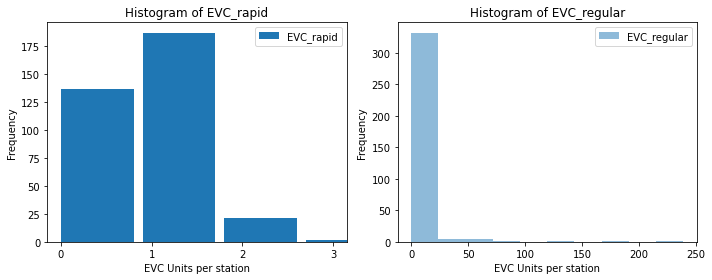

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
bins = 10

# Plot the histogram for EVC_rapid in the left plot
ax1.hist(EVC_loc_tokyo['EVC_rapid'], bins=bins, alpha=1, label='EVC_rapid', width=0.8)
ax1.set_xticks(range(int(EVC_loc_tokyo['EVC_rapid'].min()), int(EVC_loc_tokyo['EVC_rapid'].max()) + 1))

# Set the labels and title for the left plot
ax1.set_xlabel('EVC Units per station')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of EVC_rapid')

# Plot the histogram for EVC_regular in the right plot
ax2.hist(EVC_loc_tokyo['EVC_regular'], bins=bins, alpha=0.5, label='EVC_regular')

# Set the labels and title for the right plot
ax2.set_xlabel('EVC Units per station')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of EVC_regular')

ax1.legend()
ax2.legend()

plt.tight_layout()

<p>Interestingly, we can see that most rapid EV charging stations have just one unit, and there were no stations with more than three units. This indicates that most charging stations are not convenient enough to attract drivers to use EVs.</p>

<p>In the next section, we analyzed rapid chargers by driving distance, feature analysis, and optimal location-allocation.</p>

## 9. Analysis (25pt)

### Question 1: Do existing EV chargers have sufficient coverage to promote EVs?

<p>First, we maped locations within a 10-minute drive from points in Tokyo where <u>at least one rapid charger </u> are installed.</p>

In [29]:
service_area_url = gis.properties.helperServices.serviceArea.url
sa_layer = network.ServiceAreaLayer(service_area_url, gis=gis)

In [30]:
sa_results = []
times = [datetime(2022, 4, 6, 12).timestamp() * 1000]

for i in tqdm.tqdm(range(len(EVC_loc_tokyo_subset_1))):
    facilities = EVC_loc_tokyo_subset_1.loc[i,'lonlat'].replace('[', '').replace(']', '')
    result = sa_layer.solve_service_area(facilities=facilities, default_breaks=[10],
                                         travel_direction='esriNATravelDirectionFromFacility',
                                         time_of_day=times, time_of_day_is_utc=False)
    sa_results.append(result)

100%|██████████| 210/210 [00:40<00:00,  5.23it/s]


In [31]:
tokyo_fset_list=[]
for result in sa_results:
    poly_feat_list = []
    for polygon_dict in result['saPolygons']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])
    
    tokyo_fset_list.append(service_area_fset)

In [32]:
tokyo_map_1 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_1.basemap = 'arcgis-topographic'
tokyo_map_1

MapView(layout=Layout(height='400px', width='100%'))

In [33]:
# Add Tokyo boundary
pref_boundary_item = gis.content.get('c145e30920e04b59928079c39a2f7fcd')
pref_boundary_layer = pref_boundary_item.layers[0].query(where='JCODE>= 13101 and JCODE<=13123')
tokyo_map_1.add_layer(pref_boundary_layer)

In [34]:
tokyo_map_1.clear_graphics()

for fset in tqdm.tqdm(tokyo_fset_list):
    tokyo_map_1.draw(fset)

100%|██████████| 210/210 [01:22<00:00,  2.54it/s]



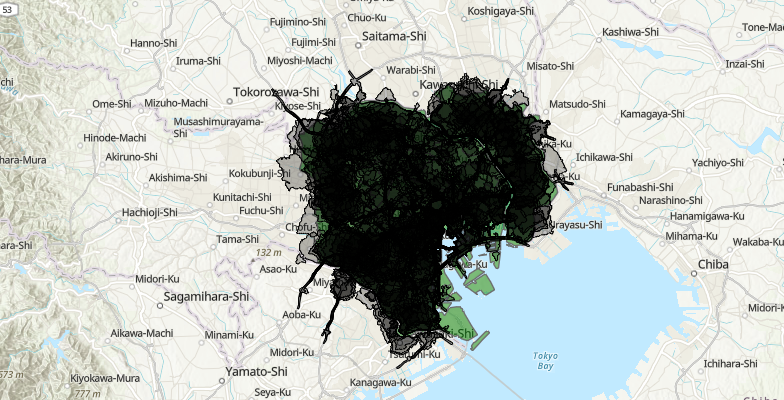

In [37]:
# Export as png image
file_path = data_location+'tokyo_map_1.png'
tokyo_map_1.take_screenshot(file_path=file_path)

<p>The map above shows drivers can reach a rapid charger within 10 minutes in Tokyo. However, a single rapid charger cannot charge multiple EVs simultaneously. Therefore, we next map locations within a 10-minute drive from where <u>two or more rapid chargers</u> are installed and see if there is any difference.</p>

In [35]:
EVC_loc_tokyo_subset_2 = EVC_loc_tokyo[EVC_loc_tokyo['EVC_rapid']>=2]
EVC_loc_tokyo_subset_2 = EVC_loc_tokyo_subset_2.reset_index(drop=True)

sa_results = []
times = [datetime(2022, 4, 6, 12).timestamp() * 1000]

for i in tqdm.tqdm(range(len(EVC_loc_tokyo_subset_2))):
    facilities = EVC_loc_tokyo_subset_2.loc[i,'lonlat'].replace('[', '').replace(']', '')
    result = sa_layer.solve_service_area(facilities=facilities, default_breaks=[10],
                                         travel_direction='esriNATravelDirectionFromFacility',
                                         time_of_day=times, time_of_day_is_utc=False)
    sa_results.append(result)

100%|██████████| 23/23 [00:04<00:00,  5.43it/s]


In [36]:
tokyo_fset_list_2=[]
for result in sa_results:
    poly_feat_list = []
    for polygon_dict in result['saPolygons']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])
    
    tokyo_fset_list_2.append(service_area_fset)

In [37]:
tokyo_map_2 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_2.basemap = 'arcgis-topographic'
tokyo_map_2

MapView(layout=Layout(height='400px', width='100%'))

In [38]:
tokyo_map_2.add_layer(pref_boundary_layer)

In [39]:
tokyo_map_2.clear_graphics()

for fset in tqdm.tqdm(tokyo_fset_list_2):
    tokyo_map_2.draw(fset)

100%|██████████| 23/23 [00:01<00:00, 14.62it/s]



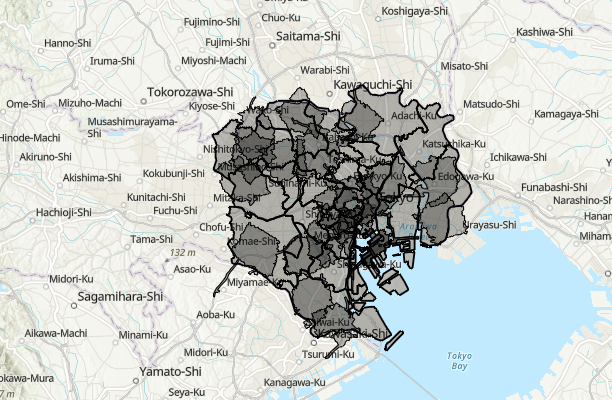

In [40]:
# Export as png image
file_path = data_location+'tokyo_map_2.png'
tokyo_map_2.take_screenshot(file_path=file_path)

<p>We can confirm that there are too few EV chargers with two or more units, and their coverage is insufficient. As Oda et al. (2018) found that only one unit of EV charger can cause inconvenience to drivers, it is essential to increase the number of stations with two or more units to incentivize people to buy EVs.</p>

<p>One way to tackle this problem is to allocate one additional unit to stations with only one unit charger. Therefore, we solved the location-allocation problem with Maximize Coverage Solver. However, understanding the demand for EV chargers is not as easy as said. More importantly, the only data at hand that is more granular than municipal data is population data. Thus, we analyzed the vital feature of EV charger allocations in Tokyo and created a weighted index from population data and the vital features.</p>

### Question 2: Are the existing EV chargers unevenly distributed among certain socioeconomic communities?

<p>We performed a socio-economic analysis by using an OLS (Ordinary Least Squares) regression. The first step was to import a municipality-level boundary data.</p>

In [55]:
# Import cleaned X variable data for municipalities
X_tokyo = pd.read_csv(path+"X_tokyo_enhance.csv", nrows=23) # Only municipalities
X_tokyo

,CITY_ENG,Municipality,car_owner,parking,total_pop,net_inflow_pop,foreign_pop,net_migration,hh_member,assisted,...,road_area,employee,avg_age,total_income_pop,300_pop,300_500_pop,500_700_pop,700_1000_pop,1000_1500_pop,_1500_pop
0,Chiyoda-ku,1,"31,715","18,349","66,680","794,656","2,814",387,1.79,577,...,"2,787,768","31,065",42.7,"35,220","6,830","6,770","5,170","4,610","4,250","5,030"
1,Chuo-ku,1,"42,283","16,848","169,179","467,419","8,062",301,1.82,"1,029",...,"3,047,548","35,745",42.3,"90,360","16,690","20,280","14,510","13,540","12,480","7,960"
2,Minato-ku,1,"77,078","22,934","260,486","697,492","16,929",282,1.77,"1,727",...,"4,448,059","37,116",42.9,"136,930","26,540","32,710","17,250","15,110","15,020","11,950"
3,Shinjuku-ku,1,"51,356","15,880","349,385","441,988","33,907","1,558",1.55,"8,908",...,"3,415,571","32,274",43.9,"213,510","61,240","44,840","21,910","18,300","12,250","6,690"
4,Bunkyo-ku,1,"31,344","3,411","240,069","126,408","9,746",711,1.77,"1,921",...,"1,955,589","13,018",43.3,"125,450","30,920","28,750","16,100","16,040","12,590","9,520"
5,Taito-ku,1,"32,515","4,030","211,444","105,857","13,896",427,1.70,"7,611",...,"2,626,920","22,770",46.1,"115,660","28,480","29,740","18,730","13,980","7,900","2,880"
6,Sumida-ku,1,"47,078","5,082","272,085","22,907","11,892",834,1.85,"6,381",...,"2,958,672","15,492",45.2,"137,180","37,320","39,560","20,220","16,860","9,200","2,680"
7,Koto-ku,1,"111,696","34,325","524,310","110,425","29,275",584,1.97,"7,684",...,"5,755,680","18,024",44.0,"253,970","70,950","61,220","37,740","35,950","23,060","9,340"
8,Shinagawa-ku,1,"69,840","10,961","422,488","157,167","12,538",-678,1.77,"4,561",...,"4,030,594","20,123",44.2,"218,230","54,550","52,150","32,850","26,870","19,590","8,350"
9,Meguro-ku,1,"52,721","2,172","288,088","16,209","8,794",-835,1.84,"2,400",...,"2,319,238","11,389",43.9,"146,760","33,660","35,650","18,760","16,570","13,190","8,990"


In [56]:
X_tokyo.iloc[:, 1:25] = X_tokyo.iloc[:, 1:25] .replace(',', '', regex=True).astype(float)

# Population weighting for population-driven data
X_tokyo["car_owner"] = X_tokyo["car_owner"]/X_tokyo["total_pop"]
X_tokyo["parking"] = X_tokyo["parking"]/X_tokyo["total_pop"]
X_tokyo["net_inflow_pop"] = X_tokyo["net_inflow_pop"]/X_tokyo["total_pop"]
X_tokyo["foreign_pop"] = X_tokyo["foreign_pop"]/X_tokyo["total_pop"]
X_tokyo["net_migration"] = X_tokyo["net_migration"]/X_tokyo["total_pop"]
X_tokyo["assisted"] = X_tokyo["assisted"]/X_tokyo["total_pop"]
X_tokyo["employee"] = X_tokyo["employee"]/X_tokyo["total_pop"]

# Land area weighting for land-use data
X_tokyo["land_house"] = X_tokyo["land_house"]/X_tokyo["land_total"]
X_tokyo["land_farm"] = X_tokyo["land_farm"]/X_tokyo["land_total"]
X_tokyo["land_unused"] = X_tokyo["land_unused"]/X_tokyo["land_total"]
X_tokyo["road_length"] = X_tokyo["road_length"]/X_tokyo["land_total"]
X_tokyo["road_area"] = X_tokyo["road_area"]/X_tokyo["land_total"]

# Income population weighting for income range population data
X_tokyo["300_pop"] = X_tokyo["300_pop"]/X_tokyo["total_income_pop"]
X_tokyo["300_500_pop"] = X_tokyo["300_500_pop"]/X_tokyo["total_income_pop"]
X_tokyo["500_700_pop"] = X_tokyo["500_700_pop"]/X_tokyo["total_income_pop"]
X_tokyo["700_1000_pop"] = X_tokyo["700_1000_pop"]/X_tokyo["total_income_pop"]
X_tokyo["1000_1500_pop"] = X_tokyo["1000_1500_pop"]/X_tokyo["total_income_pop"]
X_tokyo["_1500_pop"] = X_tokyo["_1500_pop"]/X_tokyo["total_income_pop"]

In [57]:
# Merge it to dataset with y variable
grouped_EVC = muni_EVC.groupby('CITY_ENG')['EVC_rapid'].sum() # y variable
dataset = X_tokyo.merge(grouped_EVC, on='CITY_ENG', how='left')
dataset['EVC_rapid'] = dataset['EVC_rapid'].fillna(0)

# Population weighting for y variable
dataset['EVC_rapid'] = dataset['EVC_rapid']*100000 /dataset["total_pop"]

# Make dataset for histgram by merging boundary polygon column
hist = dataset.merge(tokyo_muni, on='CITY_ENG', how='left')

# Delete unnecessary columns
dataset = dataset.drop(columns=["CITY_ENG", "total_pop", "land_total", "total_income_pop"])
display(dataset.isnull().sum(), dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 22
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Municipality    23 non-null     float64
 1   car_owner       23 non-null     float64
 2   parking         23 non-null     float64
 3   net_inflow_pop  23 non-null     float64
 4   foreign_pop     23 non-null     float64
 5   net_migration   23 non-null     float64
 6   hh_member       23 non-null     float64
 7   assisted        23 non-null     float64
 8   land_house      23 non-null     float64
 9   land_farm       23 non-null     float64
 10  land_unused     23 non-null     float64
 11  road_length     23 non-null     float64
 12  road_area       23 non-null     float64
 13  employee        23 non-null     float64
 14  avg_age         23 non-null     float64
 15  300_pop         23 non-null     float64
 16  300_500_pop     23 non-null     float64
 17  500_700_pop     23 non-null     float

Municipality      0
car_owner         0
parking           0
net_inflow_pop    0
foreign_pop       0
net_migration     0
hh_member         0
assisted          0
land_house        0
land_farm         0
land_unused       0
road_length       0
road_area         0
employee          0
avg_age           0
300_pop           0
300_500_pop       0
500_700_pop       0
700_1000_pop      0
1000_1500_pop     0
_1500_pop         0
EVC_rapid         0
dtype: int64

None

In [58]:
# Aggregate the rapid charger amount by boundaries
hist = gpd.GeoDataFrame(hist, geometry='SHAPE')

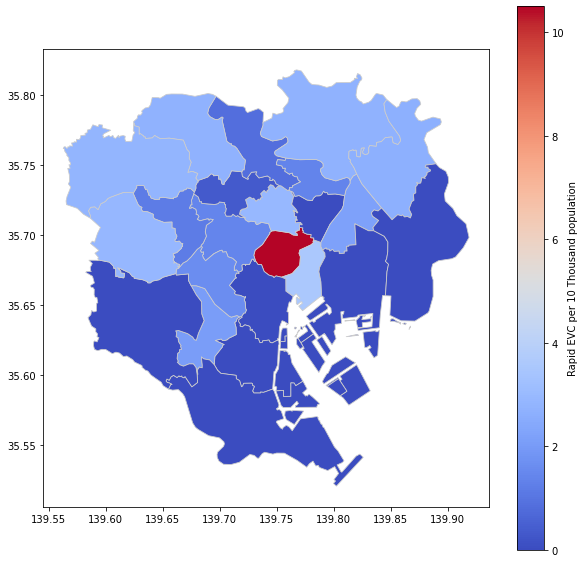

In [59]:
# Heat map and Histgral of rapid EV charger units
fig, ax = plt.subplots(figsize=(10, 10))
hist.plot(column='EVC_rapid', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
sm = ScalarMappable(norm=Normalize(vmin=hist['EVC_rapid'].min(), vmax=hist['EVC_rapid'].max()), cmap='coolwarm')
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Rapid EVC per 10 Thousand population')

plt.show()

<p>Before conducting feature analysis, we mapped the number of rapid chargers per 10,000 population. It looks very center of the Tokyo area has more EV stations than other areas. One possible reason for this is that the center of the Tokoyo, Chiyoda-ku, has more non-residential business areas than others.</p>

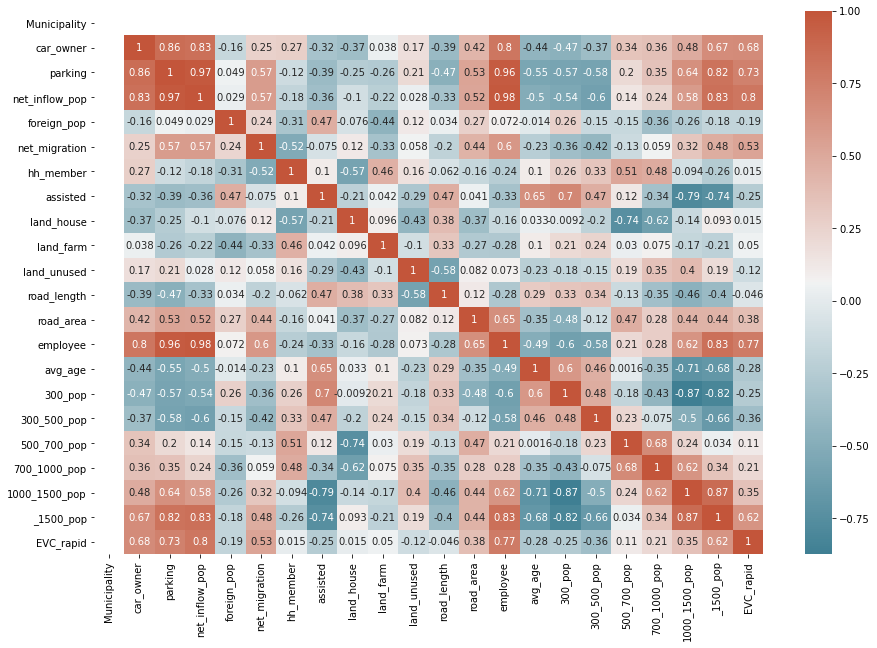

In [66]:
# Making a correlation heatmap & a pairwise plot

dataset['EVC_rapid'] = dataset['EVC_rapid']/100000


corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.show()

<p>After examining multiple methods, we ran an OLS regression as our final model (Please read the appendix.). We found that 23 municipalities are too small for machine learning. However, including neighboring cities ruined our model even after controlling available variables. Also, using granular polygons for geoenrichment failed due to data quality and accessibility.</p>

In [67]:
# Drop highly correlated variables to avoid multi-collinearity
drop_columns = ["Municipality","net_inflow_pop","employee" ,"parking" ,"1000_1500_pop"]
dataset_reg = dataset.drop(columns=drop_columns)

# Make lables
labels = ["car_owner", 'foreign_pop', 'net_migration', 'hh_member',"assisted", "land_house",'land_farm','land_unused', 'road_length', "road_area", 'employee', "avg_age", "300_pop", "300_500_pop", "500_700_pop", "700_1000_pop", "_1500_pop"]

# Define the dependent variable (y) and independent variables (X)
y = dataset_reg["EVC_rapid"]
X = dataset_reg.drop("EVC_rapid", axis=1)

# Add a constant column to X for the intercept term
X = statmodels.add_constant(X)

# Fit the OLS model
model = statmodels.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              EVC_rapid   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     4.144
Date:                Mon, 12 Jun 2023   Prob (F-statistic):             0.0440
Time:                        21:20:51   Log-Likelihood:                 242.66
No. Observations:                  23   AIC:                            -451.3
Df Residuals:                       6   BIC:                            -432.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.000     -0.773

<p>The results from the OLS regression showed the R-squared was high, and there were two significant variables at a 90% confidence interval: annual in-migration and the proportion of the
people with income lower than 3 million JPY. Intuitively, in-migration is positively significant because it shows recent development trends. However, it is counterintuitive that the proportion of the people with income lower than 3 million JPY was positively significant because we assumed that EV chargers are located in affluent areas. One possible explanation is that the current distribution of EV chargers is driven by government subsidies that only target the first unit of EV chargers per station. Companies might have installed a charger just because they can get a subsidy and might not have considered the demand for a charging unit. Therefore, we decided not to combine these two variables for weighting and did several weighting strategies in the following section.</p>

### Question 3: Where are the optimal places to locate EV charging stations?

<p>We set the charging stations with only one rapid charger as potential sites where additional chargers should be installed. Then, we made demand points by weighting population points with important features: annual in-migration and the proportion of the people with income lower than 3 million JPY. Also, we weighted them with the proportion of the people with income higher than 7 million JPY to see the difference. Since each variable ranges differently, we normalized each of them. Note that our normalization method is only based on our decisions. Future work can dig into the appropriate weighting method. </p>

In [68]:
facilities = EVC_loc_tokyo_subset_1[EVC_loc_tokyo_subset_1['EVC_rapid']==1]
EVC_loc_tokyo_subset_3 = facilities
facilities["EVC_rapid"].max()

1

In [69]:
facilities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 187 entries, 0 to 209
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Unnamed: 0   187 non-null    int64   
 1   name         187 non-null    object  
 2   address      187 non-null    object  
 3   EVC_rapid    187 non-null    int64   
 4   EVC_regular  187 non-null    int64   
 5   category     187 non-null    object  
 6   lonlat       187 non-null    object  
 7   geometry     187 non-null    geometry
 8   lon          187 non-null    object  
 9   lat          187 non-null    object  
dtypes: geometry(1), int64(3), object(6)
memory usage: 16.1+ KB


In [70]:
tract = pd.read_csv(path+'tract_tokyo.csv', encoding='UTF-8')
tract = tract[['pop','lon','lat']]

demand = tract.dropna(how='any').reset_index(drop=True)

demand_points = gpd.GeoDataFrame()
demand_points['geometry'] = None
display(demand.lon)

demand = gpd.GeoDataFrame(
    demand, geometry=gpd.points_from_xy(demand.lon, demand.lat))
demand_points['geometry'] = demand['geometry']

demand_points = demand_points.set_geometry('geometry')

0      139.762136
1      139.745124
2      139.746306
3      139.743401
4      139.740097
          ...    
822    139.872692
823    139.849629
824    139.855361
825    139.898325
826    139.881728
Name: lon, Length: 827, dtype: float64

In [77]:
dissolved_muni_EVC = muni_EVC.dissolve(by='CITY_ENG', aggfunc='sum').reset_index()
weighting_muni = dissolved_muni_EVC.merge(X_tokyo, on='CITY_ENG', how='left').reset_index()
demand['row_num'] = range(len(demand))
weighting_muni['row_num'] = range(len(weighting_muni))
demand = gpd.sjoin(demand, weighting_muni, how='inner', op='within', lsuffix='_dem', rsuffix='_weight').reset_index()

# Weight demand by the percentage of affluent residents, which is a decision variable
demand['affluent'] = demand['700_1000_pop']+demand['1000_1500_pop']+demand['_1500_pop']

## If the targeted variable is raging from negative to positive values, we need to normalize them into 0 to 1 values.
#min_value = np.min(demand["net_migration"])
#max_value = np.max(demand["net_migration"])
#demand["norm_weight"] = 0.5 + (demand["net_migration"]-min_value)/(max_value-min_value)/2
#demand["driver_pop"] = demand["pop"]*demand["norm_weight"]

In [78]:
demand

,level_0,pop,lon,lat,geometry,row_num__demand,index__weighting,CITY_ENG__dem,Municipality_x,car_owner_x,...,avg_age,total_income_pop,300_pop,300_500_pop,500_700_pop,700_1000_pop,1000_1500_pop,_1500_pop,row_num__weight,affluent
0,0,18.0,139.762136,35.675969,POINT (139.76214 35.67597),0,0,Chiyoda-ku,1.0,0.475630,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.394378
1,1,12.0,139.745124,35.672078,POINT (139.74512 35.67208),1,0,Chiyoda-ku,1.0,0.475630,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.394378
2,2,574.0,139.746306,35.675895,POINT (139.74631 35.67589),2,0,Chiyoda-ku,1.0,0.475630,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.394378
3,3,425.0,139.743401,35.681312,POINT (139.74340 35.68131),3,0,Chiyoda-ku,1.0,0.475630,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.394378
4,4,1948.0,139.740097,35.680969,POINT (139.74010 35.68097),4,0,Chiyoda-ku,1.0,0.475630,...,42.7,35220.0,0.193924,0.192220,0.146792,0.130892,0.120670,0.142817,3,0.394378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,788,15351.0,139.863964,35.759725,POINT (139.86396 35.75973),788,21,Katsushika-ku,1.0,0.224124,...,45.7,209190.0,0.326497,0.245471,0.132607,0.129786,0.051436,0.012668,6,0.193891
550,789,17591.0,139.870693,35.769584,POINT (139.87069 35.76958),789,21,Katsushika-ku,1.0,0.224124,...,45.7,209190.0,0.326497,0.245471,0.132607,0.129786,0.051436,0.012668,6,0.193891
551,790,24166.0,139.870693,35.769584,POINT (139.87069 35.76958),790,21,Katsushika-ku,1.0,0.224124,...,45.7,209190.0,0.326497,0.245471,0.132607,0.129786,0.051436,0.012668,6,0.193891
552,791,13458.0,139.859565,35.780159,POINT (139.85956 35.78016),791,21,Katsushika-ku,1.0,0.224124,...,45.7,209190.0,0.326497,0.245471,0.132607,0.129786,0.051436,0.012668,6,0.193891


In [79]:
demand_points['weight'] = demand['affluent']
demand_points = demand_points.dropna()
demand_points.info() # Point reduced because some points are not inside the boundaries we look at.

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 554 entries, 0 to 553
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  554 non-null    geometry
 1   weight    554 non-null    float64 
dtypes: float64(1), geometry(1)
memory usage: 13.0 KB


In [80]:
facilities_sedf = GeoAccessor.from_geodataframe(facilities, column_name="geometry")
facilities=facilities_sedf.spatial.to_featureset()

demand_points_sedf = GeoAccessor.from_geodataframe(demand_points, column_name="geometry")
demand_points = demand_points_sedf.spatial.to_featureset()

<p>Since 23 existing charging stations had two or more rapid chargers installed, we decided to add one new rapid charger to 23 of the 187 charging stations with only one rapid charger.</p>

In [84]:
# Run location allocation 
result = network.analysis.solve_location_allocation(    problem_type='Maximize Coverage', 
                                                        facilities=facilities, 
                                                        demand_points=demand_points,
                                                        number_of_facilities_to_find=23,
                                                        measurement_transformation_model="Linear",
                                                        #measurement_transformation_factor=2,
                                                        travel_direction='Demand to Facility',
                                                        impedance="Drive Time",
                                                        measurement_units='Minutes', 
                                                        default_measurement_cutoff=10
                                                    )

print('Solve succeeded? {}'.format(result.solve_succeeded))

Solve succeeded? True


In [85]:
result

ToolOutput(solve_succeeded=True, output_allocation_lines=<FeatureSet> 533 features, output_facilities=<FeatureSet> 187 features, output_demand_points=<FeatureSet> 554 features, output_network_analysis_layer=None, output_result_file=None, output_network_analysis_layer_package=None, usage_cost={'numObjects': 533, 'credits': 53.300000000000004})

In [86]:
# Display the analysis results in a pandas dataframe.
pd.set_option('display.max_rows', None)
alocation_results = result.output_facilities.sdf[['Name', 'FacilityType', 
                               'Weight','DemandCount', 'DemandWeight', 'TotalWeighted_Minutes', 'Total_Minutes']]
alocation_results

,Name,FacilityType,Weight,DemandCount,DemandWeight,TotalWeighted_Minutes,Total_Minutes
0,九段会館テラス,3,1.0,65,19.67536,110.8288,381.980705
1,ヨドバシカメラマルチメディアＡｋｉｂａ,3,1.0,74,19.475026,98.218041,414.988493
2,Ｏｋｕｒａ Ｈｏｕｓｅ Ｐａｒｋｉｎｇ,0,1.0,0,0.0,0.0,0.0
3,モビリティ東京 レクサス晴海,3,1.0,18,3.621097,25.469652,123.437078
4,メルセデス・ベンツ中央,0,1.0,0,0.0,0.0,0.0
5,虎ノ門ヒルズ駐車場,3,1.0,28,6.600361,39.002389,163.812622
6,モビリティ東京 レクサス高輪,0,1.0,0,0.0,0.0,0.0
7,日産自動車販売三田高輪店,0,1.0,0,0.0,0.0,0.0
8,六本木ヒルズ第２駐車場,0,1.0,0,0.0,0.0,0.0
9,アーク森ビル駐車場地下２階,0,1.0,0,0.0,0.0,0.0


In [87]:
# Define a function to display the output analysis results in a map
def visualize_locate_allocate_results(map_widget, solve_locate_allocate_result, zoom_level):
    # The map widget
    m = map_widget
    # The locate-allocate analysis result
    result = solve_locate_allocate_result
    
    # 1. Parse the locate-allocate analysis results
    # Extract the output data from the analysis results
    # Store the output points and lines in pandas dataframes
    demand_df = result.output_demand_points.sdf
    lines_df = result.output_allocation_lines.sdf

    # Extract the allocated demand points (pop) data.
    demand_allocated_df = demand_df[demand_df['DemandOID'].isin(lines_df['DemandOID'])]
    demand_allocated_fset = FeatureSet.from_dataframe(demand_allocated_df)
    display(demand_allocated_df.head())

    # Extract the un-allocated demand points (pop) data.
    demand_not_allocated_df = demand_df[~demand_df['DemandOID'].isin(lines_df['DemandOID'])]
    demand_not_allocated_df['AllocatedWeight'] = demand_not_allocated_df['AllocatedWeight'].replace(np.nan, 0)
    demand_not_allocated_df['FacilityOID'] = demand_not_allocated_df['FacilityOID'].replace(np.nan, 0)
    if len(demand_not_allocated_df)>0:
        display(demand_not_allocated_df.head())
        demand_not_allocated_fset = FeatureSet.from_dataframe(demand_not_allocated_df)

    # Extract the chosen facilities (candidate sites) data.
    facilities_df = result.output_facilities.sdf[['Name', 'FacilityType', 
                                                 'Weight','DemandCount', 'DemandWeight', 'SHAPE']]
    facilities_chosen_df = facilities_df[facilities_df['FacilityType'] == 3]
    facilities_chosen_fset = FeatureSet.from_dataframe(facilities_chosen_df)

    # 2. Define the map symbology
    # Allocation lines
    allocation_line_symbol_1 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [255,255,255,153], 'width': 0.3}

    allocation_line_symbol_2 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,255,197,39], 'width': 3}

    allocation_line_symbol_3 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,197,255,39], 'width': 5}
    
    allocation_line_symbol_4 = {'type': 'esriSLS', 'style': 'esriSLSSolid',
                                'color': [0,92,230,39], 'width': 7}
    
    # Patient points within 90 minutes drive time to a proposed location.
    allocated_demand_symbol = {'type' : 'esriPMS', 'url' : 'https://maps.esri.com/legends/Firefly/cool/1.png',
                               'contentType' : 'image/png', 'width' : 26, 'height' : 26,
                               'angle' : 0, 'xoffset' : 0, 'yoffset' : 0}

    # Patient points outside of a 90 minutes drive time to a proposed location.
    unallocated_demand_symbol = {'type' : 'esriPMS', 'url' : 'https://maps.esri.com/legends/Firefly/warm/1.png',
                                 'contentType' : 'image/png', 'width' : 19.5, 'height' : 19.5,
                                 'angle' : 0, 'xoffset' : 0, 'yoffset' : 0}

    # Selected facilities
    selected_facilities_symbol = {"angle":0,"xoffset":0,"yoffset":0,"type":"esriPMS",
                                  "url":'https://raw.githubusercontent.com/yimurayimura/GIS-Final-Project/main/red.png',
                                  "contentType":"image/png","width":8,"height":8}
    
    # 3. Display the analysis results in the map
    
    # Zoom out to display all of the allocated census points.
    m.zoom = zoom_level
    
    # Display the locations of pop within the specified drive time to the selected site(s).
    m.draw(shape=demand_allocated_fset, symbol=allocated_demand_symbol)

    # Display the locations of pop outside the specified drive time to the selected site(s).
    if len(demand_not_allocated_df)>0:
        m.draw(shape = demand_not_allocated_fset, symbol = unallocated_demand_symbol)

    # Display the chosen site.
    m.draw(shape=facilities_chosen_fset, symbol=selected_facilities_symbol)
    m.draw(shape=result.output_allocation_lines, symbol=allocation_line_symbol_2)
    m.draw(shape=result.output_allocation_lines, symbol=allocation_line_symbol_1)

In [88]:
# Display the analysis results in a map.

tokyo_map_3 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_3.basemap = 'arcgis-topographic'
tokyo_map_3

MapView(layout=Layout(height='400px', width='100%'))

In [89]:
tokyo_map_3.add_layer(pref_boundary_layer)

In [90]:
visualize_locate_allocate_results(tokyo_map_3, result, zoom_level=10)

,ObjectID,Name,Weight,AllocatedWeight,GroupName,ImpedanceTransformation,ImpedanceParameter,SourceID,SourceOID,PosAlong,...,SnapZ,DistanceToNetworkInMeters,DemandOID,FacilityOID,FacilityID,Cutoff,Bearing,BearingTol,NavLatency,SHAPE
0,1,Location 1,0.394378,0.394378,<NA>,<NA>,<NA>,1,6161990,0.425771,...,0.0,0.748359,1,3866,6,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.7621359000001, ""y"": 35.6759691000000..."
1,2,Location 2,0.394378,0.394378,<NA>,<NA>,<NA>,1,6159285,0.312422,...,0.0,1.876922,2,3866,6,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.74512390000007, ""y"": 35.672078000000..."
2,3,Location 3,0.394378,0.394378,<NA>,<NA>,<NA>,1,6161031,0.837676,...,0.0,61.05603,3,3866,6,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.74630600000012, ""y"": 35.675895000000..."
3,4,Location 4,0.394378,0.394378,<NA>,<NA>,<NA>,1,6159295,0.088061,...,0.0,62.890287,4,3866,6,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.74340100000006, ""y"": 35.681312000000..."
4,5,Location 5,0.394378,0.394378,<NA>,<NA>,<NA>,1,6162074,1.0,...,0.0,27.470818,5,3866,6,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.7400969480001, ""y"": 35.6809686000000..."


,ObjectID,Name,Weight,AllocatedWeight,GroupName,ImpedanceTransformation,ImpedanceParameter,SourceID,SourceOID,PosAlong,...,SnapZ,DistanceToNetworkInMeters,DemandOID,FacilityOID,FacilityID,Cutoff,Bearing,BearingTol,NavLatency,SHAPE
41,42,Location 42,0.394378,0.0,<NA>,<NA>,<NA>,1,6985270,0.066916,...,0.0,0.268818,42,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.778083282, ""y"": 35.69790390000003, ""..."
83,84,Location 84,0.174418,0.0,<NA>,<NA>,<NA>,1,6160433,0.156076,...,0.0,0.61594,84,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.78257530000008, ""y"": 35.654618100000..."
109,110,Location 110,0.174418,0.0,<NA>,<NA>,<NA>,1,6145634,0.596047,...,0.0,7.455168,110,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.77142160000005, ""y"": 35.625901800000..."
121,122,Location 122,0.174418,0.0,<NA>,<NA>,<NA>,1,6158175,0.283663,...,0.0,13.398513,122,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.7232722000001, ""y"": 35.6904492000000..."
169,170,Location 170,0.376051,0.0,<NA>,<NA>,<NA>,1,6970543,1.0,...,0.0,19.760208,170,0,<NA>,<NA>,<NA>,<NA>,<NA>,"{""x"": 139.73412840000003, ""y"": 35.705668500000..."


In [91]:
# Export as png image
file_path = data_location+'tokyo_map_3_rich.png'
tokyo_map_3.take_screenshot(file_path=file_path)

Cannot take screenshot if widget is not visible in notebook: Please try again when widget is visible.


False

In [ ]:
EVC_loc_tokyo_subset_3['DemandCount'] = alocation_results['DemandCount']

EVC_loc_tokyo_subset_3 = EVC_loc_tokyo_subset_3[EVC_loc_tokyo_subset_3['DemandCount']>=1]
EVC_loc_tokyo_subset_3 = EVC_loc_tokyo_subset_3.reset_index(drop=True)
EVC_loc_tokyo_subset_3['lonlat'] = EVC_loc_tokyo_subset_3['geometry'].astype(str)

sa_results = []
times = [datetime(2022, 4, 6, 12).timestamp() * 1000]

for i in tqdm.tqdm(range(len(EVC_loc_tokyo_subset_3))):
    facilities = EVC_loc_tokyo_subset_3.loc[i,'lonlat'].replace('POINT (', '').replace(' ', ',').replace(')', '')
    result = sa_layer.solve_service_area(facilities=facilities, default_breaks=[10],
                                         travel_direction='esriNATravelDirectionFromFacility',
                                         time_of_day=times, time_of_day_is_utc=False)
    sa_results.append(result)

In [ ]:
tokyo_fset_list=[]
for result in sa_results:
    poly_feat_list = []
    for polygon_dict in result['saPolygons']['features']:
        f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
        poly_feat_list.append(f1)
        
    service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])
    
    tokyo_fset_list.append(service_area_fset)

MapView(layout=Layout(height='400px', width='100%'))


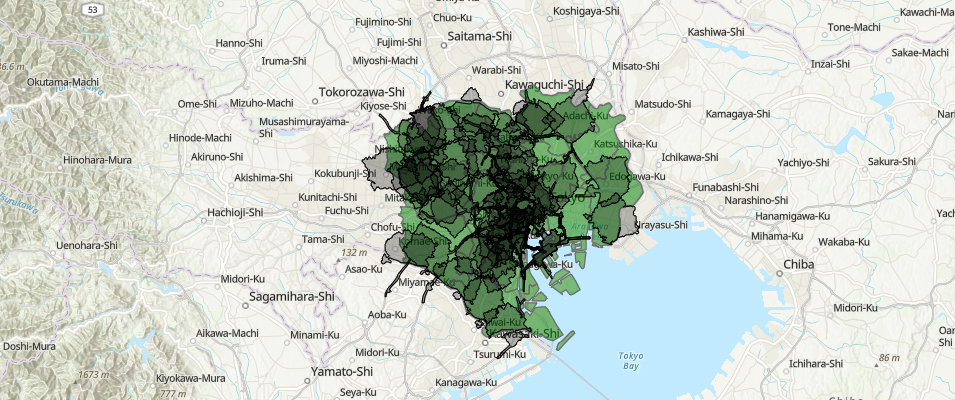

In [65]:
tokyo_map_4 = gis.map('Tokyo, Japan', zoomlevel=10)
tokyo_map_4.basemap = 'arcgis-topographic'
tokyo_map_4

In [66]:
tokyo_map_4.add_layer(pref_boundary_layer)

In [67]:
tokyo_map_4.clear_graphics()

for fset in tqdm.tqdm(tokyo_fset_list):
    tokyo_map_4.draw(fset)

for fset in tqdm.tqdm(tokyo_fset_list_2):
    tokyo_map_4.draw(fset)

100%|██████████| 23/23 [00:01<00:00, 17.80it/s]



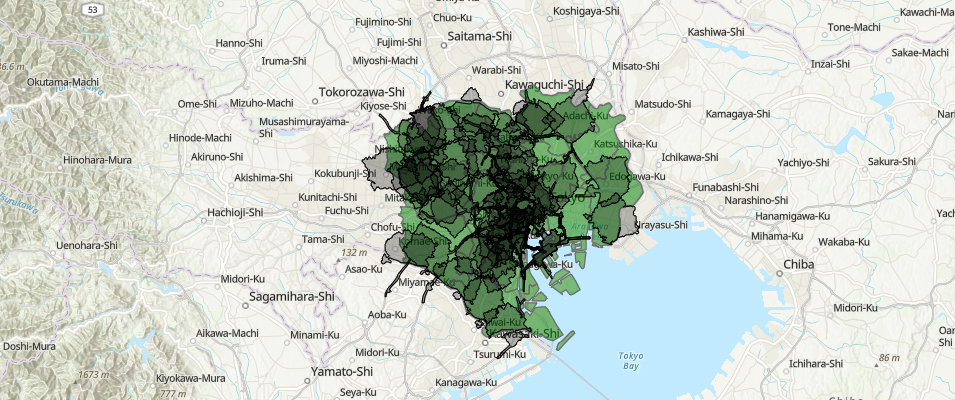

In [68]:
# Export as png image
file_path = data_location+'tokyo_map_4_rich.png'
tokyo_map_4.take_screenshot(file_path=file_path)

<p>Changing the weighting did not make a significant difference in the charging stations where the solver selected new rapid chargers to be installed. One possible explanation would be that population is a significantly important feature compared to others. Another explanation would be that we undervalued weighting variables. From our analysis, the government should target those commonly selected points for subsidy.</p>

## 10. Summary of products and results (10pt)

### Question 1: Do existing EV chargers have sufficient coverage to promote EVs?

<p>347 facilities in the 23 municipalities of Tokyo have at least one EV charger installed. When these facilities are displayed on a map of Tokyo, the number of chargers appears to be sufficient to promote EV adoption. However, if we limit the analysis to facilities with fast chargers, the number of facilities decreases to 210. Many of these facilities are car dealerships, and only 23 facilities have two or more fast chargers.</p>

In [98]:
tokyo_map_2

MapView(jupyter_target='notebook', layout=Layout(height='400px', width='100%'), ready=True)

<p>Mapping the areas within a 10-minute drive from facilities with two or more fast chargers reveals that in many areas of Tokyo, a drive of 10 minutes or more is required to reach a fast charger. Furthermore, Oda et al. (2017) have shown that installing two fast chargers reduces waiting times and increases cost-effectiveness. Therefore, based on these findings, it can be concluded that the current installation status of EV chargers is not sufficient to promote EV adoption, and additional chargers should be installed as second units in stations that currently have only one charger.</p>

### Question 2: Are the existing EV chargers unevenly distributed among certain socioeconomic communities?

In [97]:
print(results.summary().tables[1])

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.000     -0.773      0.469      -0.001       0.000
car_owner      7.572e-05      0.000      0.604      0.568      -0.000       0.000
foreign_pop    5.623e-06      0.000      0.016      0.988      -0.001       0.001
net_migration     0.0065      0.003      2.143      0.076      -0.001       0.014
hh_member      1.536e-05   4.97e-05      0.309      0.768      -0.000       0.000
assisted         -0.0017      0.001     -1.224      0.267      -0.005       0.002
land_house       -0.0002      0.000     -0.750      0.482      -0.001       0.000
land_farm      9.049e-05      0.000      0.214      0.837      -0.001       0.001
land_unused      -0.0005      0.001     -1.059      0.330      -0.002       0.001
road_length    3.779e-07   3.07e-07      1.230      0.265   -3.74e-07    1.13e-06
road_area     -1

<p>The results of the OLS regression analysis indicated a correlation, at a 90% confidence interval, between the placement of EV chargers in Tokyo's municipalities and the high influx of population and the percentage of income less than 3 million JPY. The high population influx can indicate the area's economic growth and increased value, so this result is understandable. On the other hand, it was interesting that the proportion of poor had a positive correlation. The government's policy of subsidizing only the first charger might contribute to the haphazard placement of fast chargers. In other words, appropriate government support can potentially control the placement of fast chargers. These insights can contribute to policy-making regarding the optimal placement of fast chargers.</p>

### Question 3: Where are the optimal places to locate EV charging stations?

<p>EV chargers' high installation and maintenance costs and low profitability make it difficult to promote their widespread adoption without subsidies. The Japanese government has been striving to promote the adoption of EV chargers by providing subsidies. However, many installers discontinue their installations once the economic life of the chargers ends due to their lack of profitability. As a result, the number of EV chargers has not increased as planned by the government. Since fast chargers are expensive, the government must effectively allocate its limited budget through subsidies. Considering that there are approximately 1,000 gasoline stations in Tokyo and the existing 23 EV charge stations have insufficient coverage, we investigated whether it is possible to cover the entire Tokyo metropolitan area by optimally installing 23 additional rapid chargers. The results revealed that the Tokyo metropolitan area could be covered within a 10-minute drive from a charging station by optimally locating 23 chargers.</p>

In [ ]:
# Map

<p>Furthermore, we can adjust the number of EV chargers installed at each station since we can get the demand for each station.</p>

## 11. Discussion (10pt)

### Question 1: Do existing EV chargers have sufficient coverage to promote EVs?

<p>The drivable range of EVs varies from approximately 200 km to 500 km, depending on the model (Kunisawa, 2022). In Tokyo, where public transportation is widely used, an average user would require EV charging approximately once a week. However, the time required for a full charge differs significantly between rapid chargers (approximately 15 minutes) and regular chargers (100V, approximately 8 hours) (Japan Automobile Federation, n.d.). The lengthy charging time of regular chargers hinders the widespread adoption of EVs. Even if a charging station has only one rapid charger, the driver must wait in a queue. It is crucial to install an adequate number of rapid chargers located in accessible areas to promote the adoption of EVs.</p>

<p>Currently, most EV charging stations have no more than one EV charger. The number of charging stations and chargers per station is insufficient. This inadequacy may contribute to the low EV adoption rate in Tokyo, where the number of EVs in 2019 was 117,317, accounting for less than 1% of the total number of vehicles (Tokyo Metropolitan Government, n.d.).</p>

<p>On the other hand, a regular charger costs a few thousand yen, whereas a rapid charger costs over one million yen. Effective placement of charging stations is essential to utilize government budget allocations efficiently.</p>

### Question 2: Are the existing EV chargers unevenly distributed among certain socioeconomic communities?

<p>Previous studies have proposed optimal placements of EV chargers using mathematical approaches. Our study introduces novelty by incorporating geographical attributes and information through machine learning and regression analysis. However,  there is a dilemma in using machine learning to increase the number of EV chargers. Sufficient data on EV chargers are required to conduct machine learning analysis, but the number of charging stations in Tokyo is too small for machine learning. Any attempt to increase the data size by expanding the study area would result in a mix of urban and rural areas, which would change the demographic characteristics of the area. Despite these concerns, the discovery of a correlation between net migration and the placement of rapid chargers represents a crucial first step in addressing the optimal placement of rapid chargers using geographic information.</p>

### Question 3: Where are the optimal places to locate EV charging stations?

<p>Our findings indicated that most Tokyo residents would have access to a charging station within a 10-minute drive by establishing 23 charging units in Tokyo. However, there is a trade-off between the number of charging stations and chargers per station. Specifically, when the government subsidy budget is fixed, increasing the number of charging stations would decrease the number of chargers per station and vice versa. Therefore, further research is needed to determine the appropriate balance between the number of charging stations and chargers per station.</p>

<p>Furthermore, while we selected existing charging stations as potential charger locations, it is essential to consider locations that offer higher convenience to drivers, such as convenience stores, supermarkets, and restaurants. Analyzing driver behavior would be necessary for more suitable placement of charging stations.</p>

## 12. Conclusions and future work (10pt)

<p>We could address our three initial research questions. Many Tokyo residents must drive more than 10 minutes to reach existing stations with two or more rapid chargers. Additionally, we discovered that more rapid charger installations are associated with higher net migration and low income. Initially, we considered installing new stations essential to increase coverage. However, it became apparent that the limited number of units per station posed a significant problem. Therefore, considering disaster risks was no longer a critical issue. Our versatile approach can be applied to other fields and data sets. It can solve coverage maximization problems based on geographical analysis, not only for the placement of rapid chargers but also for the optimal placement of facilities.</p>

<p>Our analysis's primary benefit lies in systematically analyzing open data to gain insights into the characteristics of current placements and suggestions for future placement. Therefore, it is helpful for policymakers, including the Japanese government and the Tokyo Metropolitan Government, with similar datasets. </p>

<p>On the other hand, we faced limited available data, so we can improve our analysis with more granular data using machine learning. Also, there is room for improvement in weighting methods in finding optimal locations of EV charging stations. Nonetheless, our analysis method was the first step of GIS analysis in promoting EVs in Japan.</p>

## References

<ol>

<li>Bayram, I. Safak, et al. “Could Petrol Stations Play a Key Role in Transportation Electrification? A GIS-Based Coverage Maximization of Fast EV Chargers in Urban Environment.” IEEE Access, vol. 10, 2022, pp. 17318–17329, https://doi.org/10.1109/access.2022.3149758. Accessed 8 May. 2022.

<li>California Air Resources Board. “Cars and Light-Trucks Are Going Zero - Frequently Asked Questions.” California Air Resources Board, ww2.arb.ca.gov/resources/documents/cars-and-light-trucks-are-going-zero-frequently-asked-questions. Accessed 24 May 2023.

<li>Erbaş, Mehmet, et al. “Optimal Siting of Electric Vehicle Charging Stations: A GIS-Based Fuzzy Multi-Criteria Decision Analysis.” Energy, vol. 163, Nov. 2018, pp. 1017–1031, https://doi.org/10.1016/j.energy.2018.08.140.

<li>Ministry of Economy, Trade and Industry, Japan. “Juden Infura No Fukyu Ni Muketa Torikumi Nit Suite [Initiatives to Promote the Diffusion of Charging Infrastructure].” Cabinet Office Regulatory Reform Promotion Committee, 2022, www8.cao.go.jp/kisei-kaikaku/kisei/conference/energy/20221111/221111energy13.pdf.

<li>Momota, Kenji. “EV No Fukyu Ritsu [EV Penetration Rate].” EV DAYS, TEPCO Energy Partner, Inc., 25 Nov. 2022, evdays.tepco.co.jp/entry/2021/09/28/000020. Accessed 24 May 2023.

<li>Oda, Takuya, et al. “Mitigation of Congestion Related to Quick Charging of Electric Vehicles Based on Waiting Time and Cost–Benefit Analyses: A Japanese Case Study.” Sustainable Cities and Society, vol. 36, Jan. 2018, pp. 99–106, https://doi.org/10.1016/j.scs.2017.10.024. Accessed 24 May 2023.

<li>Xu, Hao, et al. “Optimal Placement of Charging Infrastructures for Large-Scale Integration of Pure Electric Vehicles into Grid.” International Journal of Electrical Power & Energy Systems, vol. 53, Dec. 2013, pp. 159–165, https://doi.org/10.1016/j.ijepes.2013.04.022. Accessed 11 Feb. 2022.

</ol>

## Appendix

<p>We tried multiple methods to understand important features for locating EV chargers in Tokyo. Our final method is a simple OLS regression, but here we share our struggles trying random forest regression with more municipalities data and more granular data by geoenrichment.</p>

In [ ]:
# Municipality only, random forest regression

seed = 0

y = dataset_reg["EVC_rapid"]
X = dataset_reg.drop("EVC_rapid", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(rf, X, y, cv=kfold)
print(cv_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

In [ ]:
# Apply standard scaler to test the performance change
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.nlargest(12).plot.barh(figsize=(10,10), title="Feature importance")

In [ ]:
# Use best features to test the performance change
labels_top5 =["net_migration", "foreign_pop", "_1500_pop","car_owner", "300_500_pop"]

X = dataset_reg[labels_top5]
                
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels_top5)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(rf, X, y, cv=kfold)
print(cv_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

<p>Random forest regression with municipality data did not work, presumably, because the sample size of 23 was too small. Thus, we tried to increase the data size by including surrounding cities in Tokyo. Then the data population became 49, which was still too small.</p>

In [ ]:
X_tokyo = pd.read_csv(path+"X_tokyo_enhance.csv", nrows=49)

X_tokyo.iloc[:, 1:25] = X_tokyo.iloc[:, 1:25] .replace(',', '', regex=True).astype(float)

# Population weighting for population-driven data
X_tokyo["car_owner"] = X_tokyo["car_owner"]/X_tokyo["total_pop"]
X_tokyo["parking"] = X_tokyo["parking"]/X_tokyo["total_pop"]
X_tokyo["net_inflow_pop"] = X_tokyo["net_inflow_pop"]/X_tokyo["total_pop"]
X_tokyo["foreign_pop"] = X_tokyo["foreign_pop"]/X_tokyo["total_pop"]
X_tokyo["net_migration"] = X_tokyo["net_migration"]/X_tokyo["total_pop"]
X_tokyo["assisted"] = X_tokyo["assisted"]/X_tokyo["total_pop"]

# Land area weighting for land-use data
X_tokyo["land_house"] = X_tokyo["land_house"]/X_tokyo["land_total"]
X_tokyo["land_farm"] = X_tokyo["land_farm"]/X_tokyo["land_total"]
X_tokyo["land_unused"] = X_tokyo["land_unused"]/X_tokyo["land_total"]
X_tokyo["road_length"] = X_tokyo["road_length"]/X_tokyo["land_total"]
X_tokyo["road_area"] = X_tokyo["road_area"]/X_tokyo["land_total"]

# Income population weighting for income range population data
X_tokyo["300_pop"] = X_tokyo["300_pop"]/X_tokyo["total_income_pop"]
X_tokyo["300_500_pop"] = X_tokyo["300_500_pop"]/X_tokyo["total_income_pop"]
X_tokyo["500_700_pop"] = X_tokyo["500_700_pop"]/X_tokyo["total_income_pop"]
X_tokyo["700_1000_pop"] = X_tokyo["700_1000_pop"]/X_tokyo["total_income_pop"]
X_tokyo["1000_1500_pop"] = X_tokyo["1000_1500_pop"]/X_tokyo["total_income_pop"]
X_tokyo["_1500_pop"] = X_tokyo["_1500_pop"]/X_tokyo["total_income_pop"]

dataset = X_tokyo.merge(grouped_EVC, on='CITY_ENG', how='left')
dataset['EVC_rapid'] = dataset['EVC_rapid'].fillna(0)

# Population weighting for y variable
dataset['EVC_rapid'] = dataset['EVC_rapid'] /dataset["total_pop"] # hard to interpret

# Delete unnecessary columns
dataset = dataset.drop(columns=["CITY_ENG", "total_pop", "land_total", "total_income_pop"])

# Making a correlation heatmap & a pairwise plot
corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


In [ ]:
# Drop highly correlated variables to avoid multi-collinearity
drop_columns = ["net_inflow_pop","1000_1500_pop"]
dataset_reg = dataset.drop(columns=drop_columns)

labels = ["Municipality", "car_owner", "parking", 'foreign_pop', 'net_migration', 'hh_member',"assisted", "land_house",'land_farm','land_unused', 'road_length', "road_area", 'employee', "avg_age", "300_pop", "300_500_pop", "500_700_pop", "700_1000_pop", "_1500_pop"]

y = dataset_reg["EVC_rapid"]
X = dataset_reg.drop("EVC_rapid", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(rf, X, y, cv=kfold)
print(cv_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

In [ ]:
# Apply standard scaler to test the performance change
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed)

rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))

feat_importances = pd.Series(rf.feature_importances_, index=labels)
feat_importances.nlargest(12).plot.barh(figsize=(10,10), title="Feature importance")

In [ ]:
# Use best features to test the performance change
labels_top5 =["car_owner", "land_unused", "parking","500_700_pop", "land_house"]

X = dataset_reg[labels_top5]
                
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
r1 = rf.score(X_train, y_train)
r2 = rf.score(X_test, y_test)
print('R² of Random Forest Regressor on training set: {:.3f}'.format(r1))
print('R² of Random Forest Regressor on test set: {:.3f}'.format(r2))
feat_importances = pd.Series(rf.feature_importances_, index=labels_top5)
feat_importances.plot.barh(figsize=(10,10), title="Feature importance")

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(rf, X, y, cv=kfold)
print(cv_scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (cv_scores.mean(), cv_scores.std()))

<p>Random forest regression did not work again due to a lack of data. Interestingly, the important features changed. Since unused land areas are tiny in municipality areas, we suspect including city area data may ruin the data quality. Then, we tried to use census boundaries, smaller than municipality and city boundaries, to increase the data population and maintain data quality.</p>

In [77]:
import requests

# URL of the GML file
url = "https://github.com/yimurayimura/GIS-Final-Project/raw/test/h27ka13.gml"

# Download the GML file and save it locally
response = requests.get(url)
with open("h27ka13.gml", "wb") as f:
    f.write(response.content)

# Read the local GML file using geopandas
tokyo_test = gpd.read_file("h27ka13.gml", encoding='UTF-8')


In [ ]:
sedf = GeoAccessor.from_geodataframe(tokyo_test)
cntry = arcgis.geoenrichment.Country('JAPAN')

enriched_data = cntry.enrich(study_areas=sedf, enrich_variables=analysis_variables)


In [ ]:
enriched_data

In [65]:
# Import granular census level boundary data.
import urllib.request
url = 'https://github.com/yimurayimura/GIS-Final-Project/raw/main/h27ka13.gml'
file_path = 'h27ka13.gml'
urllib.request.urlretrieve(url, file_path)
gdf = gpd.read_file(file_path)
gdf = gdf.to_crs("EPSG:4326")
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')
gdf_sub = gpd.sjoin(gdf, tokyo_muni, op='intersects', how='inner')
gdf_sub = gdf_sub.reset_index(drop=True)
cntry = arcgis.geoenrichment.Country('JPN')
sedf = GeoAccessor.from_geodataframe(gdf_sub)

In [67]:
enriched_data = cntry.enrich(study_areas=sedf)

<p>We imported granular polygons that split Tokyo municipalities into more than 2500. However, unfortunately, enrichable data was only provided by Esri Japan; all granular data year is 2015 or before. Since EV charging units were scarce at that time, we concluded that we could not predict charging locations in 2023 from these data. We decided to go back to only-municipality data and perform OLS regression to find appropriate variables for weighting demand points.</p>